In [1]:
##############################
#Finding chromosomal distribution
#of miRNA binding and non-binding sites
#
#this will define the state distribution?
#
#can also do for negative state (other state)?
#
#Then feeding the state distributions and some "fake"
#transition probabilities into the hmm in pomegranate
#will estimate real transition probabilities, correct?
# Finding chromosomal distribution
# of miRNA binding and non-binding sites
##############################

In [9]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# upload positive set
file="/Users/nickgiangreco/GitHub/HMMicro/CLIP_data/HEK293/Hafner.combined_AGO.proc.hg19.chr22.trimmed.bed"
matrix_full = pd.read_table(file,sep="\t",names=["chr","s","e"])

In [4]:
#Here I'm counting the start of mirna sites
#that occur after a quantile (right word?)
#of the length of chr22
quants=np.arange(0,1.05,0.05)
counts=[0]*20
chrLen=51304566
for i in matrix_full.s:
    ma=max(quants[i>quants*chrLen])
    index=np.nonzero(quants == ma)[0][0]
    counts[index]+=1

In [10]:
#for example, at index 9 or after 9*0.05% of
#the chr22 sequence, 37 mirna sites are observed
#before 10*0.05% of chr22 has been traversed
#
#in other words, 37 mirna sites are obserrved between
#45 and 50% of the chr22 sequence
counts

[0, 0, 0, 0, 0, 0, 3, 25, 37, 13, 5, 42, 51, 9, 34, 48, 52, 12, 11, 20]

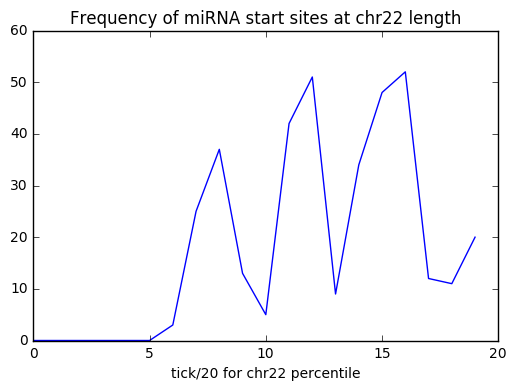

In [11]:
plt.plot(counts)
plt.title("Frequency of miRNA start sites at chr22 length")
plt.xlabel("tick/20 for chr22 percentile")
plt.show()

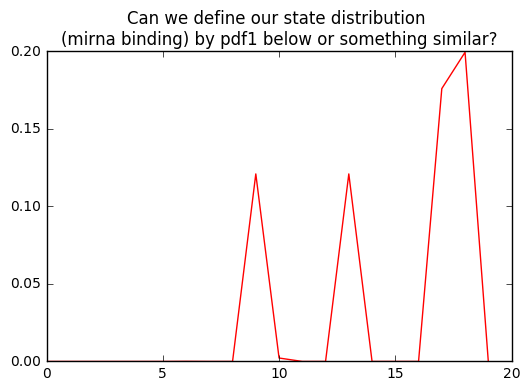

In [12]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
pdf1 = norm.pdf(counts,loc=counts[9]-2,scale=2)
plt.plot(pdf1,'r')
plt.title("Can we define our state distribution \n(mirna binding) by pdf1 below or something similar?")
plt.show()